Intent of this workbook is to pull covid data, population data, and election data related to counties in georgia and do some brief investigation

# Get URL

In [452]:
url='https://www.nytimes.com/interactive/2021/us/georgia-covid-cases.html'

In [453]:
print(url)

https://www.nytimes.com/interactive/2021/us/georgia-covid-cases.html



# Get website as webdriver and grab dataframe

In [454]:
import selenium
from selenium import webdriver as wb
webD=wb.Chrome('chromedriver.exe')
webD.get(url)

Grab button to show all county numbers

In [455]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

In [456]:
button=webD.find_element_by_xpath('//*[@id="county-trends"]/button')

In [457]:
element=webD.find_element_by_xpath('//*[@id="county-trends"]/button') # element to move to before clicking button

In [474]:
try:
    html = webD.find_element_by_tag_name('html')
    actions=ActionChains(webD)
    actions.move_to_element(element).perform()
    html.send_keys(Keys.DOWN)#must move down four spaces after finding element
    html.send_keys(Keys.DOWN)
    html.send_keys(Keys.DOWN)
    html.send_keys(Keys.DOWN)
    button.click()
except:
    print('Could not find button, try scrolling in NYtimes page until you see the "show all" button')

Import Pandas

In [459]:
import pandas as pd

In [475]:
#grab page source with open table
html=webD.page_source

In [476]:
df = pd.read_html(html, header = 0)

In [477]:
df[1]

,Unnamed: 0,Cases Daily Avg.,"Per 100,000",14-day change,Hospitalized Daily Avg.,"Per 100,000.1",14-day change.1,Deaths Daily Avg.,"Per 100,000.2",Fully Vaccinated
0,Georgia,1332,13,+1%,1531,14,+15%,28.7,0.27,21%
1,Chattahoochee ›,6,54,–74%,47,—,+16%,0.0,—,—
2,Screven ›,4,26,+83%,3,—,–55%,0.1,1.02,—
3,Catoosa ›,15,22,+14%,101,—,+6%,0.1,0.21,—
4,Glynn ›,18,21,+133%,9,—,–7%,0.1,0.17,—
...,...,...,...,...,...,...,...,...,...,...
155,Clay ›,0,—,–100%,20,—,–24%,0.0,—,—
156,Glascock ›,0,—,–100%,51,—,+13%,0.0,—,—
157,Quitman ›,0,—,—,0,—,–100%,0.0,—,—
158,Taliaferro ›,0,—,–100%,0,—,—,0.0,—,—


In [478]:
casesdf=df[1]

In [479]:
casesdf

,Unnamed: 0,Cases Daily Avg.,"Per 100,000",14-day change,Hospitalized Daily Avg.,"Per 100,000.1",14-day change.1,Deaths Daily Avg.,"Per 100,000.2",Fully Vaccinated
0,Georgia,1332,13,+1%,1531,14,+15%,28.7,0.27,21%
1,Chattahoochee ›,6,54,–74%,47,—,+16%,0.0,—,—
2,Screven ›,4,26,+83%,3,—,–55%,0.1,1.02,—
3,Catoosa ›,15,22,+14%,101,—,+6%,0.1,0.21,—
4,Glynn ›,18,21,+133%,9,—,–7%,0.1,0.17,—
...,...,...,...,...,...,...,...,...,...,...
155,Clay ›,0,—,–100%,20,—,–24%,0.0,—,—
156,Glascock ›,0,—,–100%,51,—,+13%,0.0,—,—
157,Quitman ›,0,—,—,0,—,–100%,0.0,—,—
158,Taliaferro ›,0,—,–100%,0,—,—,0.0,—,—


As we are only investigating the cases per 100,000, we can drop the rest of the columns

In [480]:
casesdf=casesdf.drop(['Cases Daily Avg.', '14-day change', 'Hospitalized Daily Avg.', 
                      'Per 100,000.1', '14-day change.1','Deaths Daily Avg.',
                      'Per 100,000.2','Fully Vaccinated'],axis=1)

Drop the first row for the state to leave only the county cases

In [481]:
casesdf=casesdf[1:]

In [482]:
casesdf.head()

,Unnamed: 0,"Per 100,000"
1,Chattahoochee ›,54
2,Screven ›,26
3,Catoosa ›,22
4,Glynn ›,21
5,Henry ›,21


Change header to be more clear

In [483]:
header={'0':['County','Cases per 100,000']}

In [484]:
headerdf=pd.DataFrame(header)

In [485]:
headerdf=headerdf.iloc[:,0]
headerdf

0               County
1    Cases per 100,000
Name: 0, dtype: object

In [486]:
casesdf.columns=headerdf

remove '> from county

In [487]:
def lastchar(string):
    return string[:-2]

In [488]:
casesdf['County']=casesdf['County'].apply(lambda string:lastchar(string))

In [489]:
casesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 1 to 159
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   County             159 non-null    object
 1   Cases per 100,000  159 non-null    object
dtypes: object(2)
memory usage: 1.3+ KB


# Import population data for georgia counties to see if there is a link in cases per capita and population

In [490]:
url='https://www.georgia-demographics.com/counties_by_population'

In [491]:
dfpop = pd.read_html(url, header = 0)

In [492]:
dfpop=dfpop[0]
dfpop.head(3)

,Rank,County,Population
0,1,Fulton County,1036200
1,2,Gwinnett County,915046
2,3,Cobb County,751218


There is one value imported that grabbed the footer of the table. Sort values by population to find index and drop that value

In [493]:
dfpop.sort_values('Population')

,Rank,County,Population
125,126,Early County,10312
0,1,Fulton County,1036200
124,125,Lanier County,10380
24,25,Whitfield County,104237
23,24,Bartow County,104919
...,...,...,...
128,129,Irwin County,9320
127,128,Johnson County,9691
25,26,Floyd County,97369
126,127,Wilkes County,9844


In [494]:
dfpop=dfpop.drop(159,axis=0) 

# Import Election Data

In [495]:
url='https://www.politico.com/2020-election/results/georgia/'

In [496]:
webD=wb.Chrome('chromedriver.exe')
webD.get(url)

In [497]:
#similar to county data, have to click "see all 159 counties" button on county results to get the county data

In [498]:
button=webD.find_element_by_xpath('//*[@id="__next"]/div[7]/div/div[1]/div[4]/div/div[2]/button')

In [499]:
element=webD.find_element_by_xpath('//*[@id="__next"]/div[7]/div/div[1]/div[4]/div/div[2]/button')

In [500]:
try:
    actions=ActionChains(webD)
    actions.move_to_element(element).perform()
    button.click()
except:
    print('Could not find button, try scrolling in NYtimes page until you see the "show all" button')

In [501]:
#grab page source with open table
html=webD.page_source

In [502]:
df = pd.read_html(html, header = 0)

In [503]:
len(df)

4

In [504]:
dfelec=df[3]
dfelec.head(3)

,County,Biden votes,Biden pct,Trump votes,Trump pct
0,Appling County,1784,21.3%,6570,78.3%
1,Atkinson County,825,26.1%,2300,72.9%
2,Bacon County,625,13.4%,4017,86.1%


As the # of votes don't mean much to us, remove these columns

In [505]:
dfelec=dfelec.drop(['Biden votes','Trump votes'],axis=1)

In [506]:
dfelec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   County     159 non-null    object
 1   Biden pct  159 non-null    object
 2   Trump pct  159 non-null    object
dtypes: object(3)
memory usage: 1.9+ KB


convert pct to numbers (drop % sign)

In [507]:
dfelec['Biden pct']=dfelec['Biden pct'].apply(lambda x:x[:-1]).astype(float)
dfelec['Trump pct']=dfelec['Trump pct'].apply(lambda x:x[:-1]).astype(float)
dfelec.head()

,County,Biden pct,Trump pct
0,Appling County,21.3,78.3
1,Atkinson County,26.1,72.9
2,Bacon County,13.4,86.1
3,Baker County,41.9,57.7
4,Baldwin County,50.1,48.8


Create an other category (third part presumably)

In [508]:
dfelec['Third Party']=100-dfelec['Trump pct']-dfelec['Biden pct']

In [509]:
dfelec[dfelec['Third Party']==dfelec['Third Party'].max()]

,County,Biden pct,Trump pct,Third Party
25,Chattahoochee County,42.2,55.6,2.2


Create a categorical column for winnner

In [510]:
def winner(x):
    if x>50:
        return 'Biden'
    else:
        return 'Trump'

In [513]:
dfelec['Winner']=dfelec['Biden pct'].apply(lambda x: winner(x))

In [514]:
dfelec.head(5)

,County,Biden pct,Trump pct,Third Party,Winner
0,Appling County,21.3,78.3,0.4,Trump
1,Atkinson County,26.1,72.9,1.0,Trump
2,Bacon County,13.4,86.1,0.5,Trump
3,Baker County,41.9,57.7,0.4,Trump
4,Baldwin County,50.1,48.8,1.1,Biden


In [516]:
dfelec['Winner'].value_counts()

Trump    130
Biden     29
Name: Winner, dtype: int64

# Combine election dataframes, population dataframe, and cases dataframe

First we need to sort all by county alphabetically

In [517]:
casesdf=casesdf.sort_values('County')
casesdf=casesdf.reset_index(drop=True)

In [518]:
dfpop=dfpop.sort_values('County')
dfpop=dfpop.reset_index(drop=True)

In [519]:
dfelec=dfelec.sort_values('County')
dfelec=dfelec.reset_index(drop=True)

In [520]:
#drop the extraneous county columns
dfpop=dfpop.drop('County',axis=1)
dfelec=dfelec.drop('County',axis=1)

,Rank,Population
0,98,18440
1,138,8239
2,121,11201
3,154,3132
4,44,45111
...,...,...
154,25,104237
155,132,8824
156,127,9844
157,131,9010


In [521]:
#comparison df
df=pd.concat([casesdf,dfpop,dfelec],axis=1)
df.head(3)

,County,"Cases per 100,000",Rank,Population,Biden pct,Trump pct,Third Party,Winner
0,Appling,9,98,18440,21.3,78.3,0.4,Trump
1,Atkinson,3,138,8239,26.1,72.9,1.0,Trump
2,Bacon,9,121,11201,13.4,86.1,0.5,Trump


# Find missing data

In [522]:
for col in df.columns:
    print(df.isnull()[col].value_counts())

False    159
Name: County, dtype: int64
False    159
Name: Cases per 100,000, dtype: int64
False    159
Name: Rank, dtype: int64
False    159
Name: Population, dtype: int64
False    159
Name: Biden pct, dtype: int64
False    159
Name: Trump pct, dtype: int64
False    159
Name: Third Party, dtype: int64
False    159
Name: Winner, dtype: int64


Missing data is represented as "—"

In [523]:
for col in df.columns:
    x=0
    x=len(df[df[col]=='—'])
    if x!=0:
        print(col + ": "+ str(x))

Cases per 100,000: 6


C:\Users\allis\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [524]:
def tona(x):
    if x=='—':
        return None
    else:
        return x

In [525]:
df['Cases per 100,000']=df['Cases per 100,000'].apply(lambda x:tona (x))

In [526]:
df=df.dropna(axis=0)

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 158
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   County             153 non-null    object 
 1   Cases per 100,000  153 non-null    object 
 2   Rank               153 non-null    object 
 3   Population         153 non-null    object 
 4   Biden pct          153 non-null    float64
 5   Trump pct          153 non-null    float64
 6   Third Party        153 non-null    float64
 7   Winner             153 non-null    object 
dtypes: float64(3), object(5)
memory usage: 7.8+ KB


Now that all missing data is gone, we can conver cases per 100,000, rank, and population to integer types

In [528]:
df['Cases per 100,000']=df['Cases per 100,000'].astype(int)
df['Rank']=df['Rank'].astype(int)
df['Population']=df['Population'].astype(int)

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 158
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   County             153 non-null    object 
 1   Cases per 100,000  153 non-null    int32  
 2   Rank               153 non-null    int32  
 3   Population         153 non-null    int32  
 4   Biden pct          153 non-null    float64
 5   Trump pct          153 non-null    float64
 6   Third Party        153 non-null    float64
 7   Winner             153 non-null    object 
dtypes: float64(3), int32(3), object(2)
memory usage: 7.8+ KB


In [530]:
df.corr()['Cases per 100,000'].sort_values()[:-1]

Rank          -0.270139
Trump pct     -0.071465
Biden pct      0.064047
Population     0.192465
Third Party    0.318188
Name: Cases per 100,000, dtype: float64

# Data Visualization

In [531]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

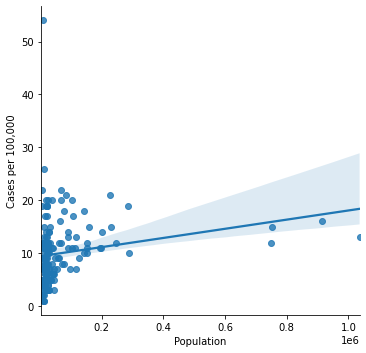

In [532]:
sns.lmplot(x='Population',y='Cases per 100,000',data=df)

Seems there are some high outliercases both for population and cases per 100,000, lets trim those out

In [536]:
dftrimmed=dftrimmed.sort_values('Cases per 100,000',ascending=False)[1:]
dftrimmed.head(1)

,County,"Cases per 100,000",Rank,Population,Biden pct,Trump pct,Third Party,Winner
123,Screven,26,111,13989,40.2,59.1,0.7,Trump


In [537]:
dftrimmedPop=dftrimmed.sort_values('Population',ascending=False)[10:]

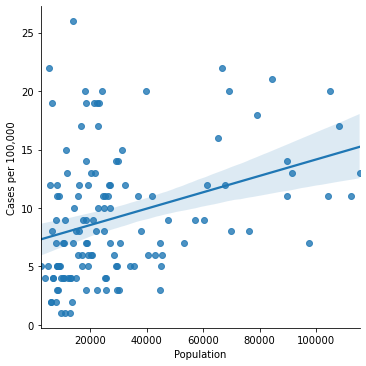

In [538]:
sns.lmplot(x='Population',y='Cases per 100,000',data=dftrimmedPop)

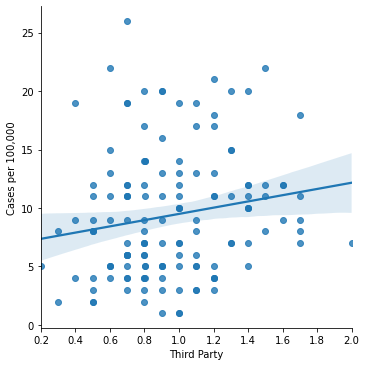

In [539]:
sns.lmplot(x='Third Party',y='Cases per 100,000',data=dftrimmed) #automatically exclude high cases county

Compare Biden vs Trump

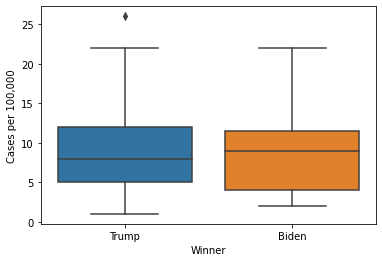

In [542]:
sns.boxplot(x='Winner',y='Cases per 100,000',data=dftrimmed)